 # Problema del Messo Viaggiatore (simulated annealing)

Si costruisca un algoritmo "simulated annealing" al fine di risolvere il problema del messo viaggiatore.

Si sceglie arbitrariamente:
- N= 32 città;
- conformazione circolare delle città (per le quali è evidentemente noto il miglior percorso);
- conformazione casuale in un quadrato delle città;

La finalità di tale algoritmo è essenzialmente il confronto con quello genetico precedentemente costruito, in particolare in termini di efficienza.

#### - algoritmo "simulated annealing":
Alla base di un algoritmo di "simulated annealing" vi è la volontà di paragonare un qualsiasi sistema/modello rappresentativo di un problema fornito con un analogo termodinamico che si sviluppi regolato dalla meccanica statistica.\
A tal proposito può essere utile un'osservazione generale rigurdo alla temperatura del sistema (posto che si dia poi un significato a questa osservabile termodinamica che è assolutamente, invece, assente in un generalissimo sistema al quale si voglia applicare il suddetto algoritmo di simulazione): più alta è la temperatura di simulazione più saranno le configurazioni esplorabili dal sistema, qualora, la temperatura si abbassasse nel limite di temperatura nulla, il sistema andrà a porsi in un minimo di energia ed in una conseguente configurazione cristallina di stabilità.

Nel caso specifico si definisca come nel caso del GA la funzione obiettivo (o $Loss Function$):
$$ L(\vec{x}_1, \dots, \vec{x}_{N-1}) = |\vec{x}_0-\vec{x}_1| + |\vec{x}_1-\vec{x}_2| + ... + |\vec{x}_{N-2}-\vec{x}_{N-1}| + |\vec{x}_{N-1}-\vec{x}_0| = \sum_{i=0}^{N-1}|\vec{x}_i-\vec{x}_{i+1}| + |\vec{x}_{N-1}-\vec{x}_0|$$
si vada quindi a considerare tale funzione come un analogo di energia del sistema termodinamico correlato.\

Si definisce di seguito uno schema di annealing $\{(\beta_1,n_1),(\beta_2,n_2),...(\beta_N,n_N)\}$, dove $\beta_i$=$1/T_i$ ed $n_i$ un numero di passi (generazioni) di simulazione adeguati tali che $\beta_i \in (0,$+$\infty)$ tenda quanto più adeguatamente possibile a +$\infty$, costituendo quindi una catena di Markow dipendente dal tempo.

Si transizioni tra le varie configurazioni del sistema (cromosomi) secondo mosse proposte in maniera analoga al GA, con una probabilità dettata da:

$$ f(n) = \begin{cases} e^{ \ -\beta ^* [L(\vec x)-L(\vec x')]} & {L(\vec x') > L(\vec x)} \\  \\ 1 & \mbox{altrimenti} \end{cases} $$

### - Circonferenza

Si considerino N città disposte su di una circonferenza di raggio pari a 1.
Forzata questa configurazione, il miglior percorso possibile è evidente essere proprio, qualora si usassero infiniti punti di passaggio, la circonferenza. 

Si producano allora dei grafici comparativi su 200 generazioni di:
- la lunghezza del miglior percorso stimato al variare del numero di generazioni;
- del miglior percorso stimato all'ultima generazione indagata;

Si rimanda a più tardi la spiegazione di come si è considerata la generazione nell'algoritmo di annealing.

In [1]:

import numpy


Gen_c, FL_c= numpy.loadtxt ( "10.1/FLoss_circonferenza.txt", usecols= (0,3), delimiter= "\t", unpack= 'true' )
Cromo_c, X_c, Y_c= numpy.loadtxt ( "10.1/bestpath_circonferenza.txt", usecols= (0,1,2), delimiter= "\t", 
                                   unpack= 'true' )

#confronto con l'algoritmo genetico
Gen_c_gen, FL_c_gen = numpy.loadtxt ( "10.1/Compare/FLoss_circonferenza.txt", usecols= (0,2), delimiter= "\t", 
                                       unpack= 'true' )
Cromo_c_gen, X_c_gen, Y_c_gen= numpy.loadtxt ( "10.1/Compare/bestpath_circonferenza.txt", usecols= (0,1,2), 
                                               delimiter= "\t", unpack= 'true' )

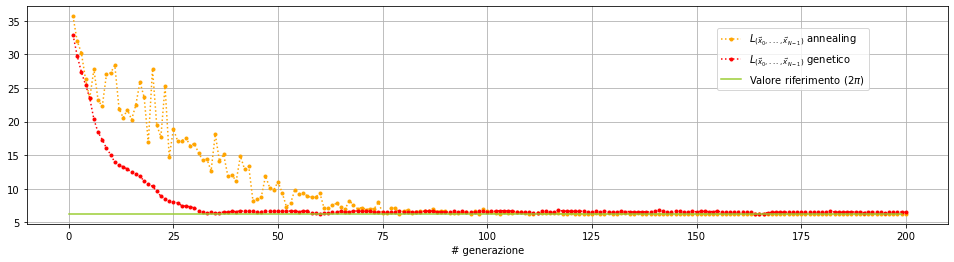

In [2]:

import matplotlib.pyplot as plt


plt.figure(figsize=(16.5, 4))
plt.plot ( Gen_c, FL_c, marker= 'o', mfc= 'orange', mec= 'orange', ms= 3, linestyle= ":", 
           color= "orange", label= r"$L_{ (\vec{x}_0,...,\vec{x}_{N-1})}$ annealing" )
plt.plot ( Gen_c_gen, FL_c_gen, marker= 'o', mfc= 'red', mec= 'red', ms= 3, linestyle= ":", 
           color= "red", label= r"$L_{ (\vec{x}_0,...,\vec{x}_{N-1})}$ genetico" )
plt.plot ( 2*numpy.pi+numpy.zeros(numpy.size(Gen_c)), color= "yellowgreen", label= "Valore riferimento (2$\pi$)" )
plt.xlabel('# generazione')
plt.ylabel(r'')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.75, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Si è riportato, inoltre, un valore di riferimento ideale pari a $2\pi$, relativo al caso limite di un percorso di infiniti punti, ma che comunque può dare un'idea indicativa a quale ordine di grandezza debbano convergere gli algoritmi costruiti.

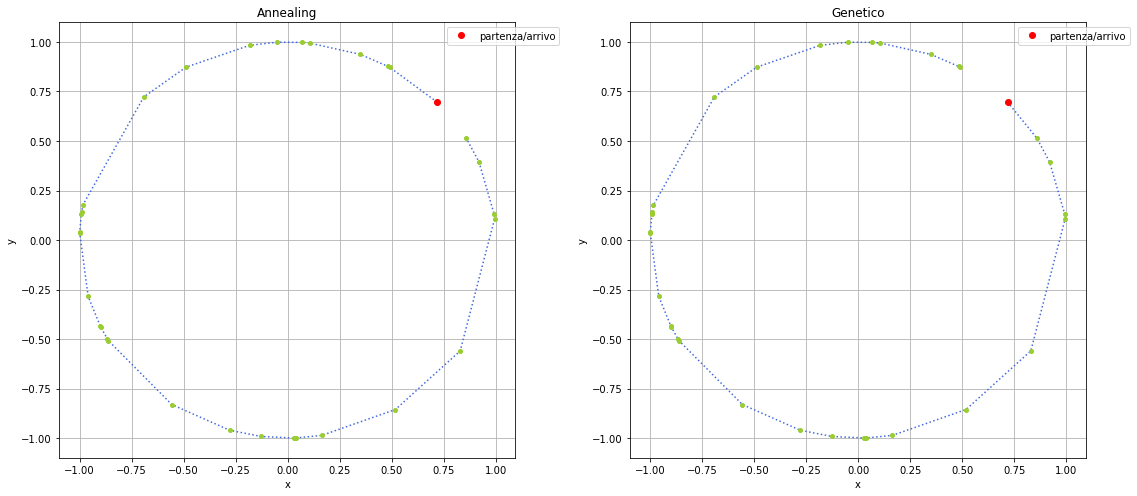

In [3]:

fig, axs = plt.subplots(1, 2, figsize=(16, 7))

axs[0].plot ( X_c, Y_c, marker= 'o', mfc= 'yellowgreen', mec= 'yellowgreen', ms= 4, linestyle= ":", 
              color= "royalblue" )
axs[0].plot ( X_c[0], Y_c[0], marker= 'o', mfc= 'red', mec= 'red', ms= 6, linestyle= "none", 
              label= "partenza/arrivo")
axs[0].set( xlabel= 'x', ylabel= 'y' )
axs[0].set_title( "Annealing" )
axs[0].grid(True)
axs[0].legend( bbox_to_anchor= (0.85, 0.99), loc= 'upper left', borderaxespad= 0. )

axs[1].plot ( X_c_gen, Y_c_gen, marker= 'o', mfc= 'yellowgreen', mec= 'yellowgreen', ms= 4, linestyle= ":",
              color= "royalblue" )
axs[1].plot ( X_c_gen[0], Y_c_gen[0], marker= 'o', mfc= 'red', mec= 'red', ms= 6, linestyle= "none", 
              label= "partenza/arrivo")
axs[1].set( xlabel= 'x', ylabel= 'y' )
axs[1].set_title( "Genetico" )
axs[1].grid(True)
axs[1].legend( bbox_to_anchor= (0.85, 0.99), loc= 'upper left', borderaxespad= 0. )

plt.tight_layout()
plt.show()


Come si può osservare il percorso graficato da entrambi gli algoritmi è il medesimo (sebbene in senso opposto, ma mantenendo un ordine di attiguità tra le città); tuttavia la rapidità di convergenza è differente, come anche il comportamento degli algoritmi.\
L'algoritmo di annealing è decisamente più graduale nel generare configurazioni che soddisfino il problema; in generale è visibile come non è nemmeno detto che evolva sempre e solo in configurazioni che ottimizzino il problema (si osservi la forma di $f(n)$), tuttavia non presentando un comportamento a gradini come il GA, è possibili elaborare strategie per permettergli di arrestarsi giunti ad una certa precisione desiderata.

### - Quadrato

Si considerino N città disposte casualmente su un piano 2-dimensionale (per semplicità si limiti lo spazio ad un quadrato di lato 10).

Si producano allora dei grafici comparativi di:
- la lunghezza del miglior percorso stimato al variare del numero di generazioni;
- del miglior percorso stimato all'ultima generazione indagata;

In [4]:

Gen_q, FL_q= numpy.loadtxt ( "10.1/FLoss_quadrato.txt", usecols= (0,3), delimiter= "\t", unpack= 'true' )
Cromo_q, X_q, Y_q= numpy.loadtxt ( "10.1/bestpath_quadrato.txt", usecols= (0,1,2), delimiter= "\t",
                                   unpack= 'true' )

#confronto con l'algoritmo genetico
Gen_q_gen, FL_q_gen = numpy.loadtxt ( "10.1/Compare/FLoss_quadrato.txt", usecols= (0,2), delimiter= "\t", 
                                       unpack= 'true' )
Cromo_q_gen, X_q_gen, Y_q_gen= numpy.loadtxt ( "10.1/Compare/bestpath_quadrato.txt", usecols= (0,1,2),
                                               delimiter= "\t", unpack= 'true' )


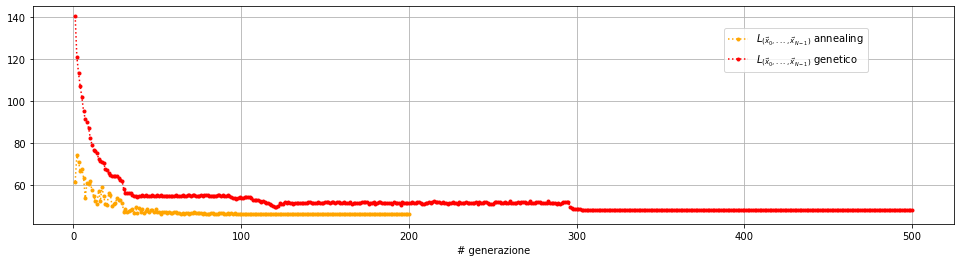

In [5]:

plt.figure(figsize=(16.5, 4))
plt.plot ( Gen_q, FL_q, marker= 'o', mfc= 'orange', mec= 'orange', ms= 3, linestyle= ":", 
           color= "orange", label= r"$L_{ (\vec{x}_0,...,\vec{x}_{N-1})}$ annealing" )
plt.plot ( Gen_q_gen, FL_q_gen, marker= 'o', mfc= 'red', mec= 'red', ms= 3, linestyle= ":", 
           color= "red", label= r"$L_{ (\vec{x}_0,...,\vec{x}_{N-1})}$ genetico" )
plt.xlabel('# generazione')
plt.ylabel(r'')
plt.grid(True)
plt.legend( bbox_to_anchor= (0.75, 0.9), loc= 'upper left', borderaxespad= 0. )

plt.show()


Come si può notare avendo utilizzato delle generazioni in maniera identica al GA, il SA converge ad una configurazione addirittura migliore.

(Non si paragonino direttamente le generazioni riportate, ma si guardi prima le note a fondo pagina.)

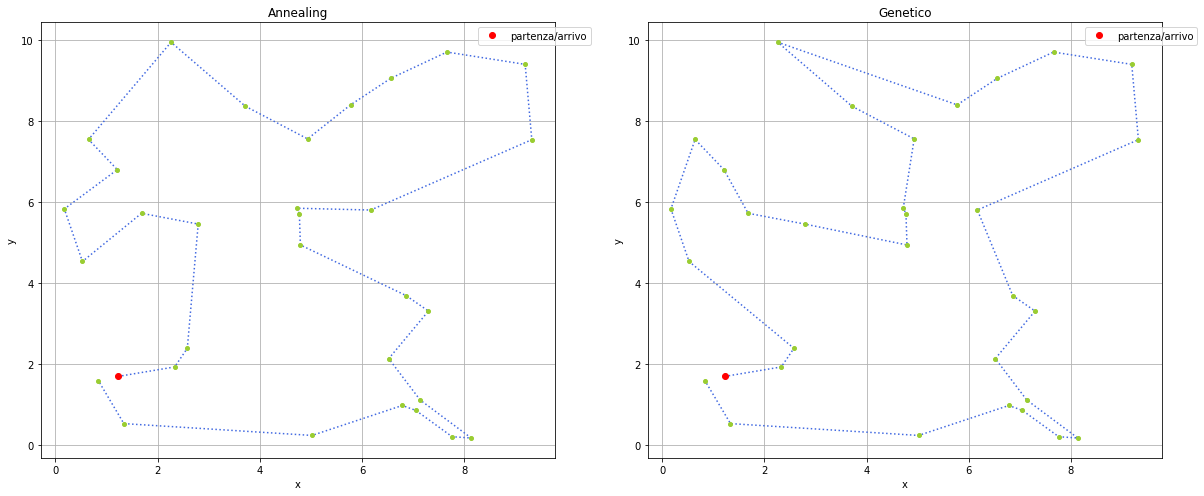

In [6]:

fig, axs = plt.subplots(1, 2, figsize=(17, 7))

axs[0].plot ( X_q, Y_q, marker= 'o', mfc= 'yellowgreen', mec= 'yellowgreen', ms= 4, linestyle= ":", 
             color= "royalblue" )
axs[0].plot ( X_q[0], Y_q[0], marker= 'o', mfc= 'red', mec= 'red', ms= 6, linestyle= "none", 
              label= "partenza/arrivo")
axs[0].set( xlabel= 'x', ylabel= 'y' )
axs[0].set_title( "Annealing" )
axs[0].grid(True)
axs[0].legend( bbox_to_anchor= (0.85, 0.99), loc= 'upper left', borderaxespad= 0. )

axs[1].plot ( X_q_gen, Y_q_gen, marker= 'o', mfc= 'yellowgreen', mec= 'yellowgreen', ms= 4, linestyle= ":", 
              color= "royalblue" )
axs[1].plot ( X_q_gen[0], Y_q_gen[0], marker= 'o', mfc= 'red', mec= 'red', ms= 6, linestyle= "none", 
             label= "partenza/arrivo")
axs[1].set( xlabel= 'x', ylabel= 'y' )
axs[1].set_title( "Genetico" )
axs[1].grid(True)
axs[1].legend( bbox_to_anchor= (0.85, 0.99), loc= 'upper left', borderaxespad= 0. )

plt.tight_layout()
plt.show()


Si rammenta come sono state costruite le generazioni.\
Considerando una popolazione iniziale di 200'000 cromosomi, ed una temperatura iniziale T=1, ad ognuna delle 200 generazioni si è diminuita la temperatura di un fattore 1.03 (così da avere un fattore $\beta$ finale di circa 360, corrispondente ad una temperatura $T_{end}= \ $2.8x10$^{-3}$) e i conseguenti cromosomi indagati a $\frac{200000}{\beta_i}$, al fine di non appesantire il calcolo nel momento in cui le configurazioni indagate divengono sempre meno valide per uno spostamento.\
La costruzione del codice così descritto impiega circa lo stesso tempo utilizzato dal GA precedentemente costruito ($\sim 4min$).

Così facendo, nel medesimo tempo computazionale, è estremante di impatto visualizzare nuovamente come sia differente il comportamento dei due algoritmi. In particolare ci si sofferma questa volta su quanto risulti stabile l'algoritmo di annealing una volta superate le prime configurazioni, permettendo non solo di diminuire come detto il numero di calcoli effettuati e rendendolo più efficiente nelle sue fasi avanzate, ma permettendo anche a necessità di potervi applicare concetti statistici di limite (CLT).

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

 # Problema del Messo Viaggiatore (algoritmi genetici in parallelo)

Al fine di risolvere il problema del messo viaggiatore, ovvero minimizzare il percorso compiuto nel vistare N città facendo poi ritorno alla prima, si sfrutti l'algoritmo genetico costruito in precedenza, parallelizzandolo e costituendo M continenti che si influenzino ogni K generazioni scambiandosi alcuni tra i migliori elementi delle rispettive popolazioni.

Si sceglie arbitrariamente:
- N= 32 città;
- K= 5 generazioni;
- M= 4 continenti;
- 200 generazioni totali;
- una conformazione casuale in un quadrato delle città;

Si decide infine di scambiare i cromosomi secondo:
- scambio dei cromosomi numero 2,4,6,8,10,12,14,16;
- un invio dei cromosomi ciclico, ovvero il primo continente invia i propri al secondo e così via fino all'ultimo che li invierà al primo;

Si mostrino quindi i benefici dell'azione in parallelo dei contenenti, e si grafichi al termine il miglior percorso stimato.

#### - Azione in parallelo:
Al fine di mostrare le potenzialità del codice parallelo in M continenti, si producono i seguenti grafici, considerando N città disposte casualmente su un piano 2-dimensionale (per semplicità si limiti lo spazio ad un quadrato di lato 10):
- un grafico della lunghezza del miglior percorso stimato e del valor medio della lunghezza dei percorsi stimati nella migliore metà della popolazione $\langle L \rangle_{bh}$ al variare delle generazioni;
- un grafico del miglior percorso assoluto stimato in tutti i continenti, confrontato con un singolo continente a scelta, al variare delle generazioni;

Si osservino tali grafici nell'idea di valutare quanto, rispetto ad ogni singolo continente, la migliore stima "mondiale" converga più rapidamente a percorsi minimizzati. Inoltre, si osservi come si influenzano tra loro i vari continenti.

In [7]:

Gen, FL_1, BHFL_1 = numpy.loadtxt ( "10.2/FLoss_continente1.txt", usecols= (0,1,2), delimiter= "\t", 
                                    unpack= 'true' )
FL_2, BHFL_2 = numpy.loadtxt ( "10.2/FLoss_continente2.txt", usecols= (1,2), delimiter= "\t", unpack= 'true' )
FL_3, BHFL_3 = numpy.loadtxt ( "10.2/FLoss_continente3.txt", usecols= (1,2), delimiter= "\t", unpack= 'true' )
FL_4, BHFL_4 = numpy.loadtxt ( "10.2/FLoss_continente4.txt", usecols= (1,2), delimiter= "\t", unpack= 'true' )

BP, X, Y= numpy.loadtxt ( "10.2/bestpath.txt", usecols= (0,1,2), delimiter= "\t", unpack= 'true' )


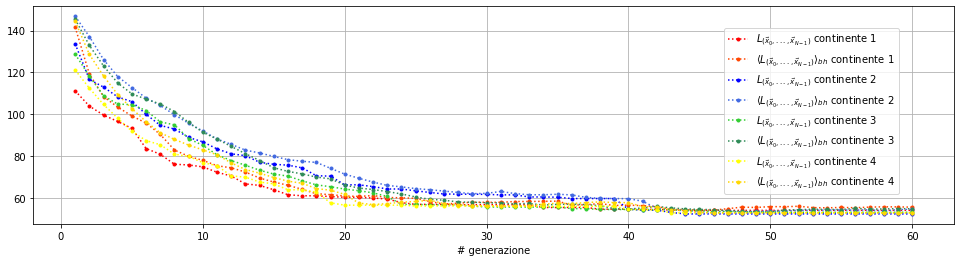

In [8]:

plt.figure(figsize=(16.5, 4))

plt.plot ( Gen[:60], FL_1[:60] ,marker= 'o', mfc= 'red', mec= 'red', ms= 3, linestyle= ":", 
           color= "red", label= r'$L_{(\vec{x}_0,...,\vec{x}_{N-1})}$ continente 1' )
plt.plot ( Gen[:60], BHFL_1[:60] ,marker= 'o', mfc= 'orangered', mec= 'orangered', ms= 3, linestyle= ":", 
           color= "orangered", label= r'$\langle L_{(\vec{x}_0,...,\vec{x}_{N-1})} \rangle_{bh}$ continente 1')

plt.plot ( Gen[:60], FL_2[:60] ,marker= 'o', mfc= 'blue', mec= 'blue', ms= 3, linestyle= ":", 
           color= "blue", label= r'$L_{(\vec{x}_0,...,\vec{x}_{N-1})}$ continente 2' )
plt.plot ( Gen[:60], BHFL_2[:60] ,marker= 'o', mfc= 'royalblue', mec= 'royalblue', ms= 3, linestyle= ":", 
           color= "royalblue", label= r'$\langle L_{(\vec{x}_0,...,\vec{x}_{N-1})} \rangle_{bh}$ continente 2')

plt.plot ( Gen[:60], FL_3[:60] ,marker= 'o', mfc= 'limegreen', mec= 'limegreen', ms= 3, linestyle= ":", 
           color= "limegreen", label= r'$L_{(\vec{x}_0,...,\vec{x}_{N-1})}$ continente 3' )
plt.plot ( Gen[:60], BHFL_3[:60] ,marker= 'o', mfc= 'seagreen', mec= 'seagreen', ms= 3, linestyle= ":", 
           color= "seagreen", label= r'$\langle L_{(\vec{x}_0,...,\vec{x}_{N-1})} \rangle_{bh}$ continente 3')

plt.plot ( Gen[:60], FL_4[:60] ,marker= 'o', mfc= 'yellow', mec= 'yellow', ms= 3, linestyle= ":", 
           color= "yellow", label= r'$L_{(\vec{x}_0,...,\vec{x}_{N-1})}$ continente 4' )
plt.plot ( Gen[:60], BHFL_4[:60] ,marker= 'o', mfc= 'gold', mec= 'gold', ms= 3, linestyle= ":", 
           color= "gold", label= r'$\langle L_{(\vec{x}_0,...,\vec{x}_{N-1})} \rangle_{bh}$ continente 4')

plt.xlabel('# generazione')
plt.ylabel(r'')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.75, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Dove si sono selezionate solo le prime 60 generazioni dal grafico al fine di meglio comprendere le differenze tra il singolo continente e la miglior stima tra tutti i continenti fino a tale generazione ottenuta.

Inoltre si notino come ogni K=5 generazioni, soprattutto negli andamenti più lenti a minimizzare vi siano dei salti importanti nella stima di $L$, dovuti alla migrazione da un continente con una popolazione "più minimizzata".

Si ricava, ora, la migliore stima ottenibile di $L$ al variare delle generazioni, al fine di confrontarla con quella di un singolo continente. A tal proposito si considera il continente 2.

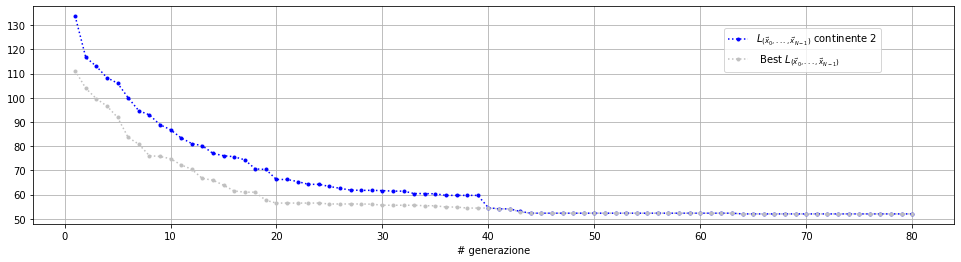

In [9]:

BestFL= [] 
n= numpy.size(FL_1)
for i in range ( n ):
    BestFL.append( min( FL_1[i],FL_2[i],FL_3[i],FL_4[i] ) )
    
plt.figure(figsize=(16.5, 4))

plt.plot ( Gen[:80], FL_2[:80] ,marker= 'o', mfc= 'blue', mec= 'blue', ms= 3, linestyle= ":", 
           color= "blue", label= r'$L_{(\vec{x}_0,...,\vec{x}_{N-1})}$ continente 2' )
plt.plot ( Gen[:80], BestFL[:80] ,marker= 'o', mfc= 'silver', mec= 'silver', ms= 3, linestyle= ":", 
           color= "silver", label= r' Best $L_{(\vec{x}_0,...,\vec{x}_{N-1})}$' )

plt.xlabel('# generazione')
plt.ylabel(r'')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.75, 0.9), loc='upper left', borderaxespad=0.)

plt.show()


Dai grafici proposti appare evidente il comportamento dell'algoritmo utilizzato.\
Qualora si fosse utilizzato l'algoritmo precedente a singolo continente, si sarebbe potuto ottenere un risultato nel lungo periodo identico, ma soprattutto nelle fasi iniziali della simulazione una sola delle coppie di tracciati evidenziati. Ciò significa che anche semplicemente la varietà di continenti proposti permette di esplorare a parità di generazione percorsi migliori solo per molteplicità casuale.\
La migrazione, infine, dei cromosomi tra continenti è un'ulteriore efficientamento del codice parallelo, che fa si di affiancare alla molteplicità causale esplorata, una convergenza delle configurazioni esplorate così da valorizzare anche le simulazioni che inizialmente presentano $L$ poco significative nel complessivo mondiale.

#### - Visualizazione del miglior percorso ottenuto:

Si visualizza il miglior percorso "mondiale" ottenuto dall'algoritmo parallelo in continenti.

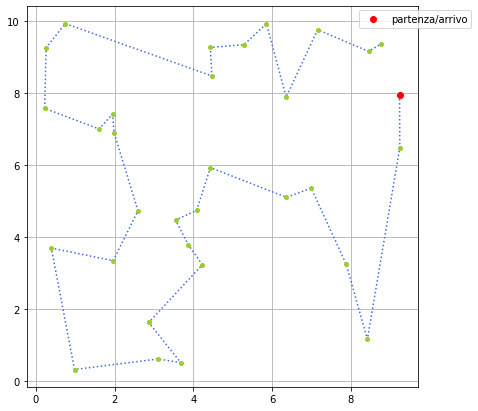

In [10]:

plt.figure(figsize=(7, 7))
plt.plot ( X, Y, marker= 'o', mfc= 'yellowgreen', mec= 'yellowgreen', ms= 4, linestyle= ":", 
           color= "royalblue" )
plt.plot ( X[0], Y[0], marker= 'o', mfc= 'red', mec= 'red', ms= 6, linestyle= "none", 
           label= "partenza/arrivo")
plt.xlabel('')
plt.ylabel(r'')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.85, 0.99), loc='upper left', borderaxespad=0.)

plt.show()


Ad onor del vero tale grafico è poco rappresentativo di per se', infatti, senza quelli precedenti potrebbe tranquillamente essere stato prodotto con tempi simulativi molto elevati anche da un algoritmo in serie.\
Tuttavia è importante osservare quanto anche visivamente non vi siano incroci tra i camminamenti tra le varie città, segno che in generale l'algoritmo abbia ben performato senza errori o bachi di programmazione.